# Decentmon data preparation

In [1]:
import pandas as pd

from decmon.constants import *
from decmon.df_utils import *
from decmon.filter import *
from decmon.plotter import *

In [2]:
# FILENAME = "sample_log.txt"
FILENAME = "2022-09-07_12-06-13_output.log"

In [3]:
path = f"{INPUT_DIR}/{FILENAME}"

df = load_simulation_data(path)

In [4]:
strategies_ddf = split_by_dictionary(df, STRATEGIES)

print(f"Strategies: {len(strategies_ddf)}. Formulae:{len(strategies_ddf[0])}")
strategies_df = pd.concat(strategies_ddf, ignore_index=True)
strategies_df

Strategies: 3. Formulae:3041


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy
0,0,1,2,3,1.00,3,"Next (Var ""b"")",{a| |c} ; {a| |c} ; {a| | } ; { | | } ; {a| |...,orchestration
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; { |b| } ; { |b|c} ; {a| |c} ; { | |...,orchestration
2,2,1,2,3,1.00,3,"Next (Var ""a"")",{a|b|c} ; {a| |c} ; { |b| } ; {a|b| } ; {a|b|...,orchestration
3,3,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; {a| | } ; { |b|c} ; { | |c} ; {a|b|...,orchestration
4,4,1,2,3,1.00,4,"Glob (Var ""b"")",{a|b| } ; {a| |c} ; {a|b| } ; { |b|c} ; {a| |...,orchestration
...,...,...,...,...,...,...,...,...,...
9118,3036,5,21,79,10.76,1153,"Until (Or (Ev (Next (And (Var ""a"", Var ""c"")))...",{ | | } ; { |b|c} ; { | | } ; { |b| } ; {a| |...,choreography
9119,3037,5,18,51,7.88,1041,"Until (Or (Var ""c"", Next (Until (Var ""b"", Var...",{ | | } ; {a| |c} ; { |b| } ; {a| |c} ; {a|b|...,choreography
9120,3038,5,22,21,2.76,143,"Next (Next (Or (Glob (Var ""a""), Ev (And (Var ...",{a| |c} ; { |b|c} ; { |b|c} ; { | |c} ; { | |...,choreography
9121,3039,5,25,48,5.66,310,"Next (Glob (Until (Until (Var ""b"", Var ""a""), ...",{ | |c} ; {a|b| } ; {a| |c} ; {a| | } ; {a| |...,choreography


In [5]:
merged_metrics = extract_metrics(strategies_df)

(trace_length, num_mess, size_mess, nb_progressions) = merged_metrics

merged_metrics.max()

formula_id             3040
strategy      orchestration
value               47303.0
metric            trace_len
dtype: object

## Formula Encoding

In [11]:
f_ops, f_ops_stats = extract_ops(strategies_df)
f_ops

,total_ops_list_1,total_ops_list_10,total_ops_list_100,total_ops_list_101,total_ops_list_102,total_ops_list_103,total_ops_list_104,total_ops_list_105,total_ops_list_106,total_ops_list_107,...,total_ops_list_90,total_ops_list_91,total_ops_list_92,total_ops_list_93,total_ops_list_94,total_ops_list_95,total_ops_list_96,total_ops_list_97,total_ops_list_98,total_ops_list_99
0,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,10,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9119,10,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9120,11,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,11,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting

<AxesSubplot:>

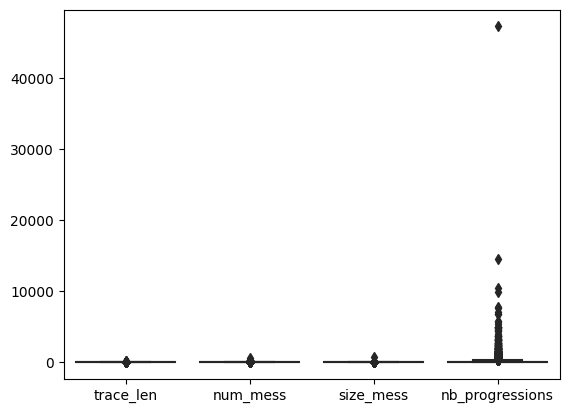

In [7]:
to_plot = strategies_df.drop(['formula_id', 'x'], axis=1)
plot_boxplot(to_plot)

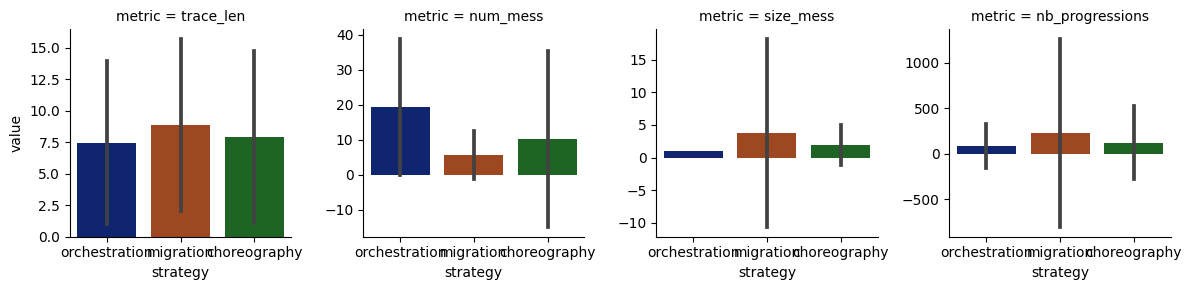

In [8]:
grid_plot = plot_grid_barplots(merged_metrics, grid_cell_field= 'metric',
          y_axis = 'value', x_axis = 'strategy',
          order = ['orchestration', 'migration', 'choreography'])

grid_plot.savefig("output/out.png")

In [9]:
ndf = merged_metrics.copy()
ndf['strategy'] = ndf['strategy'].str.replace("^cent_", "1", regex=True)
ndf['strategy'] = ndf['strategy'].str.replace("^decent_", "2", regex=True)
ndf['strategy'] = ndf['strategy'].str.replace("^odecent_", "3", regex=True)
ndf

,formula_id,strategy,value,metric
0,0,orchestration,2.0,trace_len
1,1,orchestration,2.0,trace_len
2,2,orchestration,2.0,trace_len
3,3,orchestration,2.0,trace_len
4,4,orchestration,2.0,trace_len
...,...,...,...,...
9118,3036,choreography,1153.0,nb_progressions
9119,3037,choreography,1041.0,nb_progressions
9120,3038,choreography,143.0,nb_progressions
9121,3039,choreography,310.0,nb_progressions


In [13]:
expanded_df = strategies_df.merge(f_ops, left_index=True, right_index=True)
expanded_df

,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,total_ops_list_1,...,total_ops_list_90,total_ops_list_91,total_ops_list_92,total_ops_list_93,total_ops_list_94,total_ops_list_95,total_ops_list_96,total_ops_list_97,total_ops_list_98,total_ops_list_99
0,0,1,2,3,1.00,3,"Next (Var ""b"")",{a| |c} ; {a| |c} ; {a| | } ; { | | } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; { |b| } ; { |b|c} ; {a| |c} ; { | |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1,2,3,1.00,3,"Next (Var ""a"")",{a|b|c} ; {a| |c} ; { |b| } ; {a|b| } ; {a|b|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; {a| | } ; { |b|c} ; { | |c} ; {a|b|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1,2,3,1.00,4,"Glob (Var ""b"")",{a|b| } ; {a| |c} ; {a|b| } ; { |b|c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,3036,5,21,79,10.76,1153,"Until (Or (Ev (Next (And (Var ""a"", Var ""c"")))...",{ | | } ; { |b|c} ; { | | } ; { |b| } ; {a| |...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9119,3037,5,18,51,7.88,1041,"Until (Or (Var ""c"", Next (Until (Var ""b"", Var...",{ | | } ; {a| |c} ; { |b| } ; {a| |c} ; {a|b|...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9120,3038,5,22,21,2.76,143,"Next (Next (Or (Glob (Var ""a""), Ev (And (Var ...",{a| |c} ; { |b|c} ; { |b|c} ; { | |c} ; { | |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9121,3039,5,25,48,5.66,310,"Next (Glob (Until (Until (Var ""b"", Var ""a""), ...",{ | |c} ; {a|b| } ; {a| |c} ; {a| | } ; {a| |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
expanded_df.strategy = pd.Categorical(expanded_df.strategy)
expanded_df['strategy_id'] = expanded_df.strategy.cat.codes
expanded_df

/var/folders/p7/3_3g7g_x7t9dc251z7lwpqqm0000gn/T/ipykernel_6919/4090628461.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  expanded_df['strategy_id'] = expanded_df.strategy.cat.codes


,formula_id,x,trace_len,num_mess,size_mess,nb_progressions,formula,trace,strategy,total_ops_list_1,...,total_ops_list_91,total_ops_list_92,total_ops_list_93,total_ops_list_94,total_ops_list_95,total_ops_list_96,total_ops_list_97,total_ops_list_98,total_ops_list_99,strategy_id
0,0,1,2,3,1.00,3,"Next (Var ""b"")",{a| |c} ; {a| |c} ; {a| | } ; { | | } ; {a| |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
1,1,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; { |b| } ; { |b|c} ; {a| |c} ; { | |...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,2,1,2,3,1.00,3,"Next (Var ""a"")",{a|b|c} ; {a| |c} ; { |b| } ; {a|b| } ; {a|b|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,3,1,2,3,1.00,3,"Next (Var ""c"")",{ | |c} ; {a| | } ; { |b|c} ; { | |c} ; {a|b|...,orchestration,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
4,4,1,2,3,1.00,4,"Glob (Var ""b"")",{a|b| } ; {a| |c} ; {a|b| } ; { |b|c} ; {a| |...,orchestration,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9118,3036,5,21,79,10.76,1153,"Until (Or (Ev (Next (And (Var ""a"", Var ""c"")))...",{ | | } ; { |b|c} ; { | | } ; { |b| } ; {a| |...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9119,3037,5,18,51,7.88,1041,"Until (Or (Var ""c"", Next (Until (Var ""b"", Var...",{ | | } ; {a| |c} ; { |b| } ; {a| |c} ; {a|b|...,choreography,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9120,3038,5,22,21,2.76,143,"Next (Next (Or (Glob (Var ""a""), Ev (And (Var ...",{a| |c} ; { |b|c} ; { |b|c} ; { | |c} ; { | |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
9121,3039,5,25,48,5.66,310,"Next (Glob (Until (Until (Var ""b"", Var ""a""), ...",{ | |c} ; {a|b| } ; {a| |c} ; {a| | } ; {a| |...,choreography,11,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
gsdf = expanded_df[strategies_df['nb_progressions'].isin(expanded_df.groupby(['formula_id', 'trace']).min()['nb_progressions'].values)]
gsdf1 = expanded_df.sort_values(['nb_progressions'],ascending=True).set_index(['formula_id', 'trace'])
# gsdf1

#idx = (gsdf1['nb_progressions'].min().values.tolist())
#gsdf2 = gsdf1.loc[gsdf1['nb_progressions'].min()]
gsdf2 = gsdf1[gsdf1.groupby(['formula_id', 'trace'])['nb_progressions'].transform('first') != gsdf1['nb_progressions']]
gsdf2

In [ ]:
expanded_df2 = gsdf2.reset_index()
expanded_df2

2      3378
4      1188
3      1185
5       648
6       534
7       390
8       186
10      162
11      153
13      147
9       129
12      114
18      102
14       96
16       90
15       81
17       81
20       51
26       39
21       33
19       33
22       30
25       27
29       24
28       21
41       15
23       15
31       12
27       12
51       12
24       12
34        9
37        9
36        9
39        9
38        9
30        6
33        6
32        6
48        6
53        6
35        6
40        6
46        3
82        3
61        3
50        3
54        3
60        3
57        3
145       3
64        3
45        3
42        3
67        3
Name: total_ops, dtype: int64

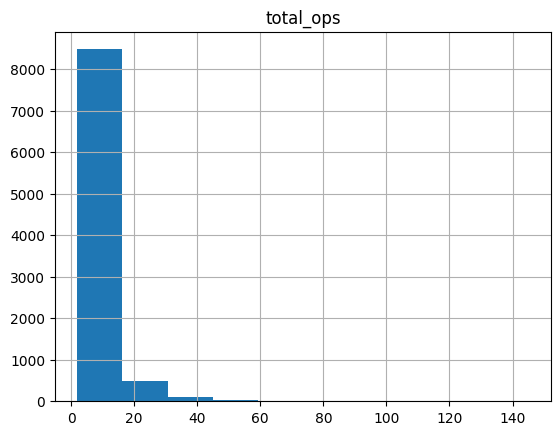

In [12]:
f_ops_stats.hist(column='total_ops')
f_ops_stats['total_ops'].value_counts()